# lesson 22 2D函数优化实例

In [2]:
import  numpy as np
from    mpl_toolkits.mplot3d import Axes3D
from    matplotlib import pyplot as plt
import  torch

## plot 

In [4]:
def himmelblau(x):
    return (x[0]**2+x[1]-11)**2 +(x[0]+x[1]**2-7)**2

In [5]:
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)

x, x.shape 

(array([-6.00000000e+00, -5.90000000e+00, -5.80000000e+00, -5.70000000e+00,
        -5.60000000e+00, -5.50000000e+00, -5.40000000e+00, -5.30000000e+00,
        -5.20000000e+00, -5.10000000e+00, -5.00000000e+00, -4.90000000e+00,
        -4.80000000e+00, -4.70000000e+00, -4.60000000e+00, -4.50000000e+00,
        -4.40000000e+00, -4.30000000e+00, -4.20000000e+00, -4.10000000e+00,
        -4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
        -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
        -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
        -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
        -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
        -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
        -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
        -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
        -8.0

In [6]:
y, y.shape 

(array([-6.00000000e+00, -5.90000000e+00, -5.80000000e+00, -5.70000000e+00,
        -5.60000000e+00, -5.50000000e+00, -5.40000000e+00, -5.30000000e+00,
        -5.20000000e+00, -5.10000000e+00, -5.00000000e+00, -4.90000000e+00,
        -4.80000000e+00, -4.70000000e+00, -4.60000000e+00, -4.50000000e+00,
        -4.40000000e+00, -4.30000000e+00, -4.20000000e+00, -4.10000000e+00,
        -4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
        -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
        -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
        -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
        -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
        -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
        -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
        -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
        -8.0

In [8]:
x,y = np.meshgrid(x,y)
x

array([[-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       ...,
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9]])

In [9]:
y

array([[-6. , -6. , -6. , ..., -6. , -6. , -6. ],
       [-6. , -6. , -6. , ..., -6. , -6. , -6. ],
       [-6. , -6. , -6. , ..., -6. , -6. , -6. ],
       ...,
       [ 5.9,  5.9,  5.9, ...,  5.9,  5.9,  5.9],
       [ 5.9,  5.9,  5.9, ...,  5.9,  5.9,  5.9],
       [ 5.9,  5.9,  5.9, ...,  5.9,  5.9,  5.9]])

In [12]:
input_ =[x,y]
input_

[array([[-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        ...,
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9]]),
 array([[-6. , -6. , -6. , ..., -6. , -6. , -6. ],
        [-6. , -6. , -6. , ..., -6. , -6. , -6. ],
        [-6. , -6. , -6. , ..., -6. , -6. , -6. ],
        ...,
        [ 5.9,  5.9,  5.9, ...,  5.9,  5.9,  5.9],
        [ 5.9,  5.9,  5.9, ...,  5.9,  5.9,  5.9],
        [ 5.9,  5.9,  5.9, ...,  5.9,  5.9,  5.9]])]

In [13]:
z = himmelblau([x,y])

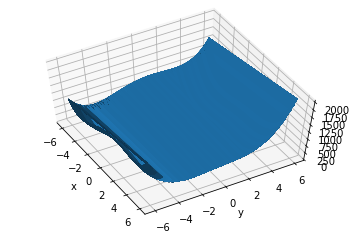

In [14]:
fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


## gradient descent 

In [16]:
x

tensor([-3.7793, -3.2832], requires_grad=True)

In [17]:
[x]

[tensor([-3.7793, -3.2832], requires_grad=True)]

In [15]:
# [1., 0.], [-4, 0.], [4, 0.]
x = torch.tensor([-4., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):

    pred = himmelblau(x)

    optimizer.zero_grad()
    pred.backward()
    optimizer.step()

    if step % 2000 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.tolist(), pred.item()))

step 0: x = [-3.999000072479248, -0.0009999999310821295], f(x) = 146.0
step 2000: x = [-3.526559829711914, -2.5002429485321045], f(x) = 19.4503231048584
step 4000: x = [-3.777446746826172, -3.2777843475341797], f(x) = 0.0012130826944485307
step 6000: x = [-3.7793045043945312, -3.283174753189087], f(x) = 5.636138666886836e-09
step 8000: x = [-3.779308319091797, -3.28318190574646], f(x) = 7.248672773130238e-10
step 10000: x = [-3.7793095111846924, -3.28318452835083], f(x) = 8.822098607197404e-11
step 12000: x = [-3.7793102264404297, -3.2831854820251465], f(x) = 8.185452315956354e-12
step 14000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
step 16000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
step 18000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0


In [18]:
x = torch.tensor([1., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):

    pred = himmelblau(x)

    optimizer.zero_grad()
    pred.backward()
    optimizer.step()

    if step % 2000 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.tolist(), pred.item()))

step 0: x = [1.0010000467300415, 0.0009999999310821295], f(x) = 136.0
step 2000: x = [2.744952917098999, 1.858483076095581], f(x) = 3.236123561859131
step 4000: x = [2.997783899307251, 2.0032827854156494], f(x) = 0.00022081792121753097
step 6000: x = [2.999986171722412, 2.0000176429748535], f(x) = 7.425342118949629e-09
step 8000: x = [2.999994993209839, 2.0000061988830566], f(x) = 9.24956111703068e-10
step 10000: x = [2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step 12000: x = [2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step 14000: x = [2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step 16000: x = [3.0, 2.0], f(x) = 0.0
step 18000: x = [3.0, 2.0], f(x) = 0.0


In [19]:
x = torch.tensor([4., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):

    pred = himmelblau(x)

    optimizer.zero_grad()
    pred.backward()
    optimizer.step()

    if step % 2000 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.tolist(), pred.item()))

step 0: x = [3.999000072479248, -0.0009999999310821295], f(x) = 34.0
step 2000: x = [3.5741987228393555, -1.764183521270752], f(x) = 0.09904692322015762
step 4000: x = [3.5844225883483887, -1.8481197357177734], f(x) = 2.1100277081131935e-09
step 6000: x = [3.5844264030456543, -1.8481241464614868], f(x) = 2.41016095969826e-10
step 8000: x = [3.58442759513855, -1.848125696182251], f(x) = 2.9103830456733704e-11
step 10000: x = [3.584428310394287, -1.8481262922286987], f(x) = 9.094947017729282e-13
step 12000: x = [3.584428310394287, -1.8481265306472778], f(x) = 0.0
step 14000: x = [3.584428310394287, -1.8481265306472778], f(x) = 0.0
step 16000: x = [3.584428310394287, -1.8481265306472778], f(x) = 0.0
step 18000: x = [3.584428310394287, -1.8481265306472778], f(x) = 0.0


In [20]:
x = torch.tensor([1., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):

    pred = himmelblau(x)

    optimizer.zero_grad()
    pred.backward()
    optimizer.step()

    if step % 2000 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.tolist(), pred.item()))

step 0: x = [1.0010000467300415, 0.0009999999310821295], f(x) = 136.0
step 2000: x = [2.744952917098999, 1.858483076095581], f(x) = 3.236123561859131
step 4000: x = [2.997783899307251, 2.0032827854156494], f(x) = 0.00022081792121753097
step 6000: x = [2.999986171722412, 2.0000176429748535], f(x) = 7.425342118949629e-09
step 8000: x = [2.999994993209839, 2.0000061988830566], f(x) = 9.24956111703068e-10
step 10000: x = [2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step 12000: x = [2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step 14000: x = [2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step 16000: x = [3.0, 2.0], f(x) = 0.0
step 18000: x = [3.0, 2.0], f(x) = 0.0
